This Python code cell is performing an Exploratory Data Analysis (EDA) on a dataset. Here's a general breakdown:

1. **Import libraries**: Necessary libraries for data handling and visualization are imported.

2. **Load data**: The dataset 'final_merged_dataset.csv' is loaded into a DataFrame.

3. **Inspect data**: The structure of the DataFrame is inspected.

4. **Handle missing values**: Missing values are identified, visualized, and then imputed.

5. **Descriptive statistics**: Basic statistics for each column are calculated.

6. **Visualize distributions**: Histograms are created for each column.

7. **Correlation analysis**: A correlation matrix is created and visualized.

8. **Outlier detection**: A boxplot is created for the 'age' column to identify outliers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   phone       5569 non-null   object 
 1   email       5569 non-null   object 
 2   name        5569 non-null   object 
 3   age         5569 non-null   float64
 4   v1          5572 non-null   object 
 5   v2          5572 non-null   object 
 6   Unnamed: 2  50 non-null     object 
 7   Unnamed: 3  12 non-null     object 
 8   Unnamed: 4  6 non-null      object 
dtypes: float64(1), object(8)
memory usage: 391.9+ KB
None
          phone                      email              name   age    v1  \
0  298-598-3142        dcobleigh0@narod.ru   Debbie Cobleigh  79.0   ham   
1  580-220-1043  tghelardi1@purevolume.com  Thacher Ghelardi  30.0   ham   
2  652-576-2335     mboxen2@shareasale.com  Mariquilla Boxen  72.0  spam   
3  550-482-8459        mburgisi3@chron.com  Marcelle Burgisi  26.0   ham   
4  8

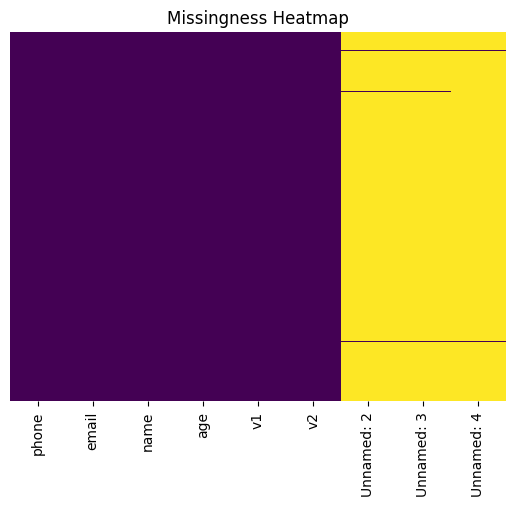

phone         0
email         0
name          0
age           0
v1            0
v2            0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
dtype: int64
      count       mean        std   min   25%   50%   75%   max
age  5572.0  51.337224  18.916441  16.0  36.0  51.0  66.0  90.0


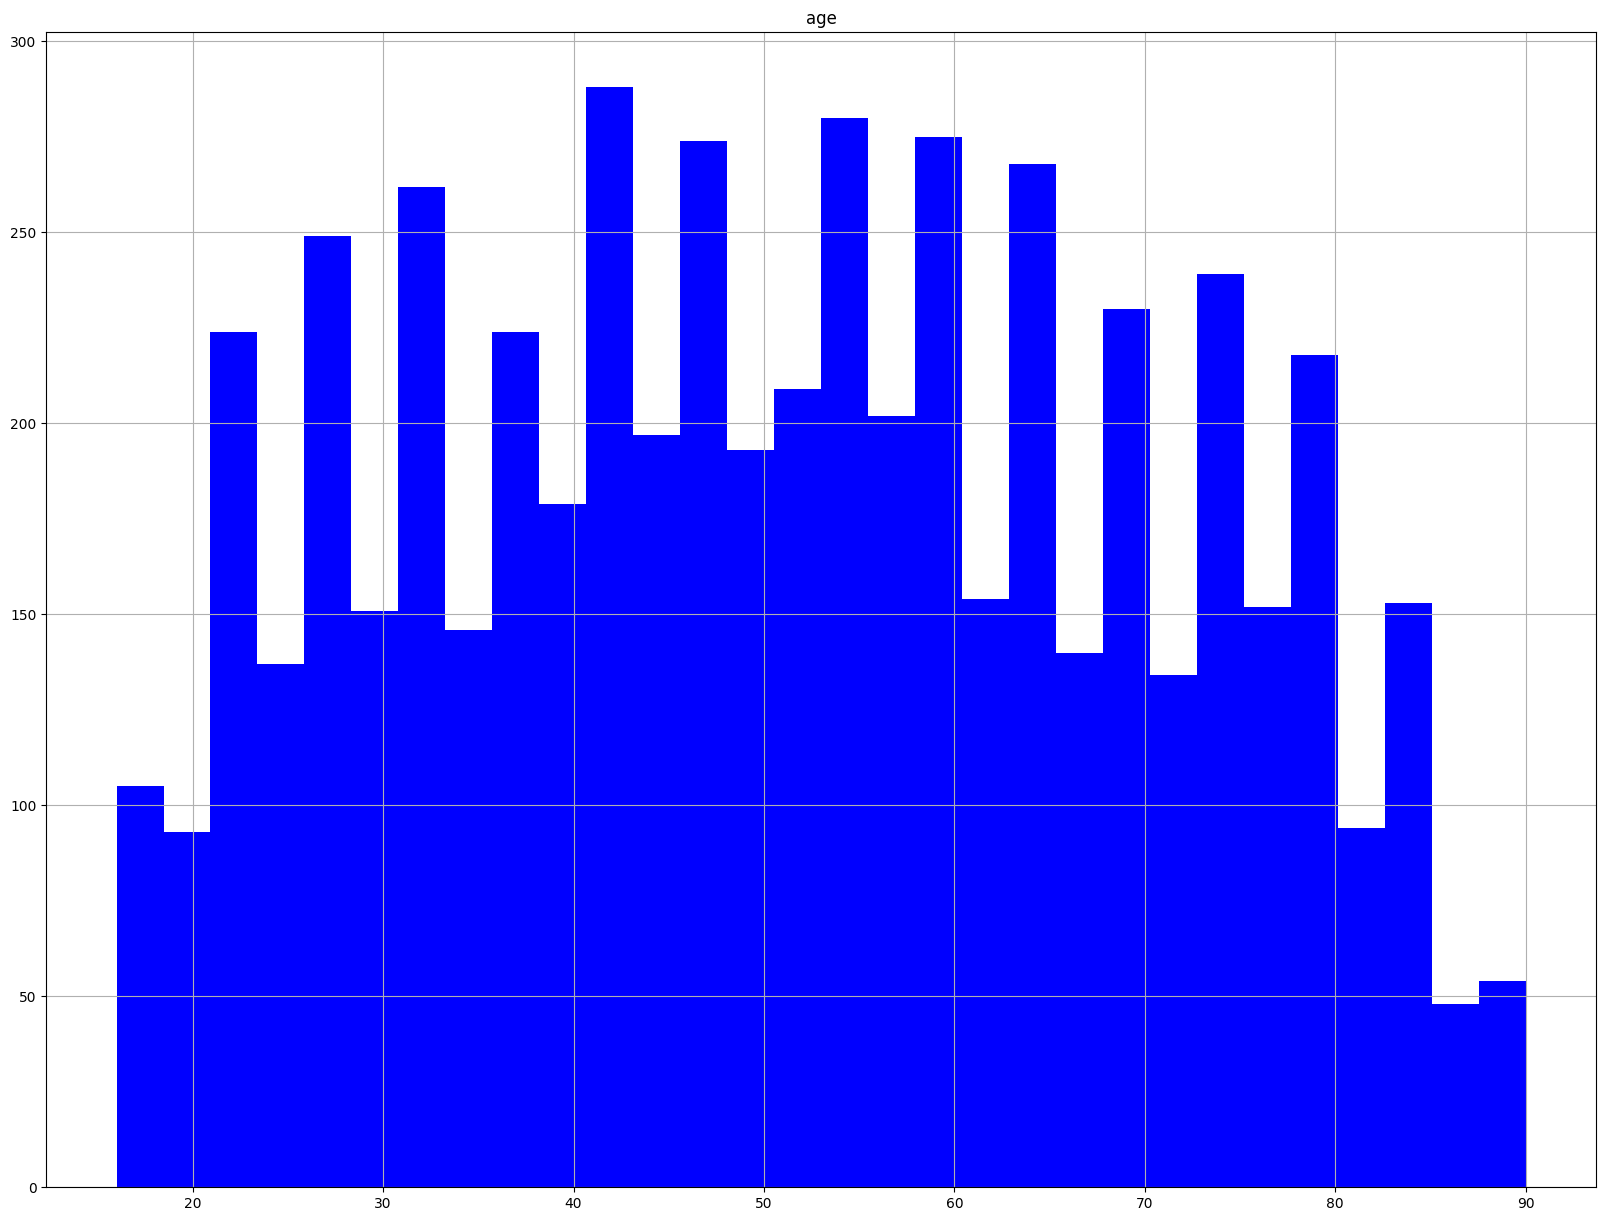

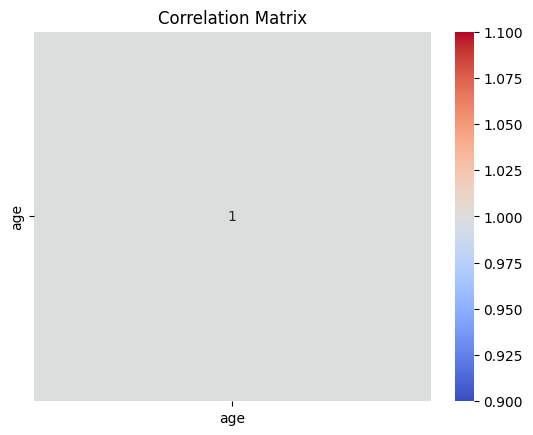

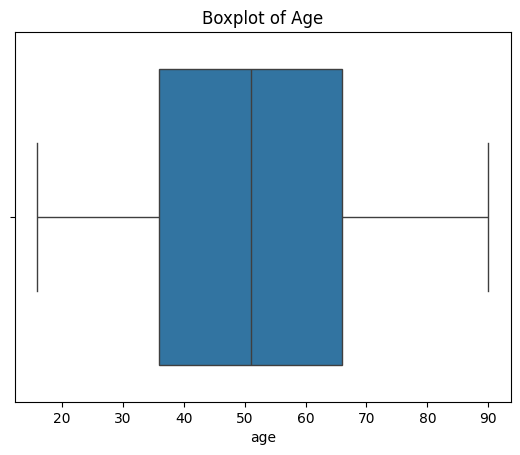

In [20]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# Load the data
df = pd.read_csv('../data/training data/final_merged_dataset.csv')

# Initial Data Inspection
print(df.info())
print(df.head())

# Quantifying Missingness
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missingness = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missingness)

# Visualizing Missingness
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missingness Heatmap')
plt.show()


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# For categorical data, you can fill with the most frequent value or a placeholder
categorical_columns = df.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = imputer.fit_transform(df[categorical_columns])

# Checking missingness after imputation
print(df.isnull().sum())

# Descriptive Statistics
print(df.describe().T)

# Distributions of Features
df.hist(bins=30, figsize=(20, 15), color='blue')
plt.show()

# Correlation Analysis
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Outlier Detection - Example using boxplot for the age column
sns.boxplot(x=df['age'])
plt.title('Boxplot of Age')
plt.show()




This Python code block is performing several operations on a DataFrame `df`:

1. **Importing Libraries**: The `re` module for regular expressions and `LabelEncoder` from `sklearn.preprocessing` are imported.

2. **Feature Creation**: Three new features - 'num_words', 'num_chars', and 'num_sentences' are created. These represent the number of words, characters, and sentences in the 'v2' column respectively.

3. **Value Mapping**: The 'v1' column values are mapped to numerical values, with 'ham' as 0 and 'spam' as 1.

4. **Label Encoding**: The 'v2' column is encoded using `LabelEncoder` and the encoded values are stored in a new column 'v2_encoded'.

5. **Numerical Data Selection**: A new DataFrame `numerical_df` is created, containing only the numerical columns from `df`.

6. **Correlation Matrix Calculation**: A correlation matrix is calculated for `numerical_df`.

7. **Correlation Matrix Visualization**: The correlation matrix is visualized using a heatmap.

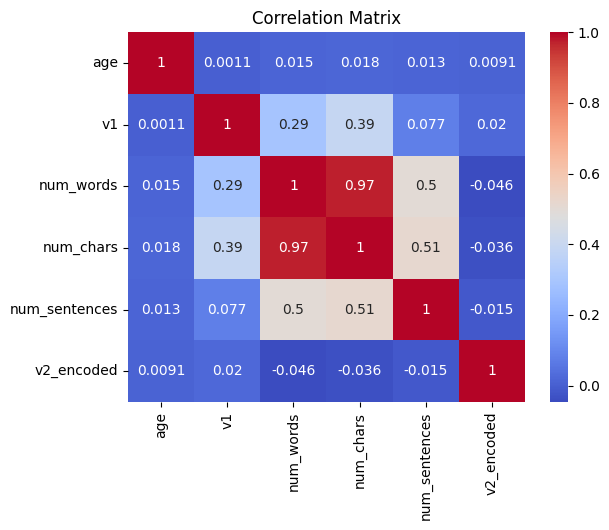

In [21]:
# Import the re module for regular expressions
import re
from sklearn.preprocessing import LabelEncoder

# Create new features for number of words, characters, and sentences
df['num_words'] = df['v2'].apply(lambda x: len(str(x).split()))
df['num_chars'] = df['v2'].apply(lambda x: len(str(x)))
df['num_sentences'] = df['v2'].apply(lambda x: len(re.findall("\.|\?|\!", str(x))))
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'v2' column
df['v2_encoded'] = label_encoder.fit_transform(df['v2'])

# Select numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()

# Visualize correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Dropping column

In [22]:
# Drop unnecessary columns
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)

# Save the cleaned dataset
df.to_csv('final_cleaned_dataset.csv', index=False)

This Python code block is performing several operations on a DataFrame `df`:

1. **Importing Libraries**: The pandas, seaborn, matplotlib.pyplot, and scipy.stats libraries are imported.

2. **Feature Creation**: Two new features - 'num_words' and 'num_chars' are created. These represent the number of words and characters in the 'v2' column respectively.

3. **Data Visualization**: Two boxplots are created to visualize the distribution of 'num_words' and 'num_chars' for each class in 'v1'. The first subplot shows the number of words by class and the second subplot shows the number of characters by class.

4. **Displaying the Plots**: The plots are displayed with `plt.show()`.

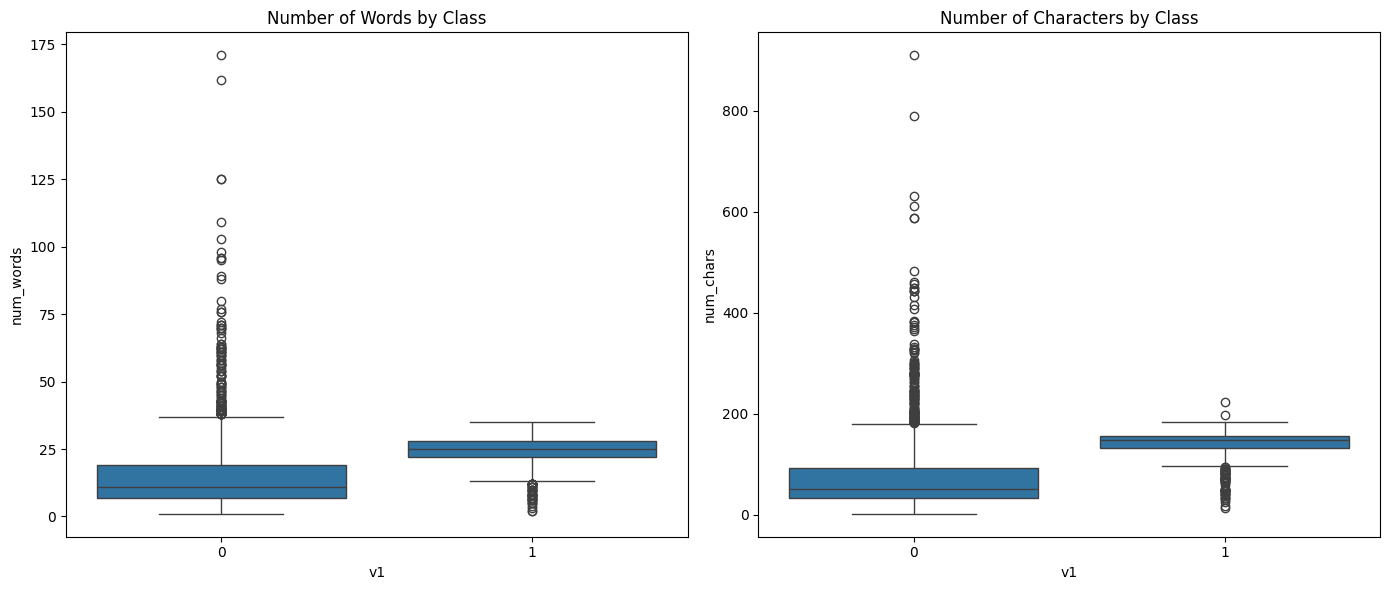

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

# Assuming df is your DataFrame
# Create new features for number of words and characters
df['num_words'] = df['v2'].apply(lambda x: len(str(x).split()))
df['num_chars'] = df['v2'].apply(lambda x: len(str(x)))

# Visualize the distribution of 'num_words' and 'num_chars' for each class in 'v1'
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='v1', y='num_words', data=df)
plt.title('Number of Words by Class')

plt.subplot(1, 2, 2)
sns.boxplot(x='v1', y='num_chars', data=df)
plt.title('Number of Characters by Class')

plt.tight_layout()
plt.show()
